 #### **TASK-2: MOVIE RATING PREDICTION WITH PYTHON**
 

Import the necessary libraries. Load the CSV file and ensure proper encoding to avoid potential errors

In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [71]:
# Load the dataset
file_path = 'IMDb Movies India.csv' 
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(df.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

##### **Exploratory Data Analysis (EDA)**
Understand the dataset structure by checking column names, types, and missing values.

In [79]:
# Overview of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14981 non-null  object 
 1   Duration  7240 non-null   object 
 2   Genre     13632 non-null  object 
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   object 
 5   Director  14984 non-null  object 
dtypes: float64(1), object(5)
memory usage: 727.1+ KB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


##### **Data Preprocessing**
Cleaning the data by handling missing values, removing duplicates, or transforming features if needed.

In [73]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [74]:
# Display the columns to ensure they are named as expected
print(df.columns)

# Dropping columns that may not be useful for prediction
# Use errors='ignore' to avoid errors if the columns were already dropped or renamed
df = df.drop(['Name', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1, errors='ignore')

# Check the updated dataframe
print(df.head())


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
     Year Duration            Genre  Rating Votes            Director
0     NaN      NaN            Drama     NaN   NaN       J.S. Randhawa
1  (2019)  109 min            Drama     7.0     8       Gaurav Bakshi
2  (2021)   90 min   Drama, Musical     NaN   NaN  Soumyajit Majumdar
3  (2019)  110 min  Comedy, Romance     4.4    35          Ovais Khan
4  (2010)  105 min            Drama     NaN   NaN        Amol Palekar


In [75]:
#df.shape
#df.info()

#### Data Visualization

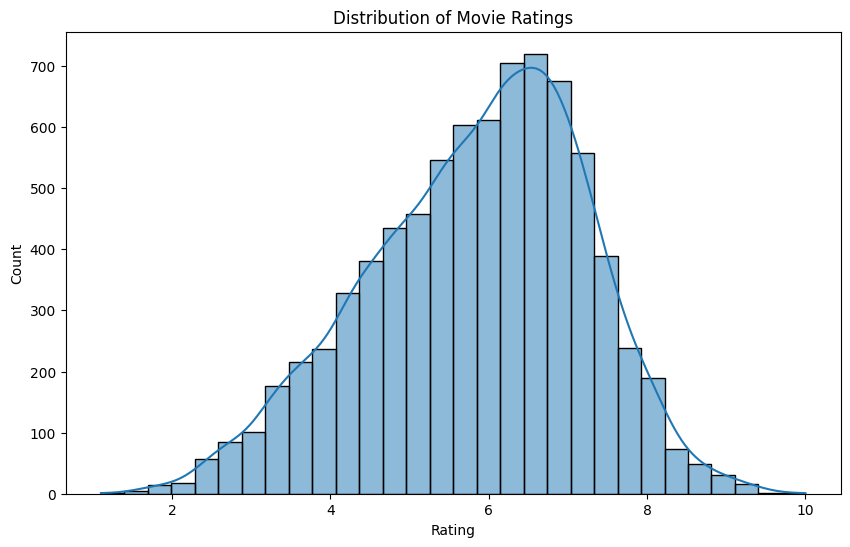

In [78]:
# Visualizing distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()

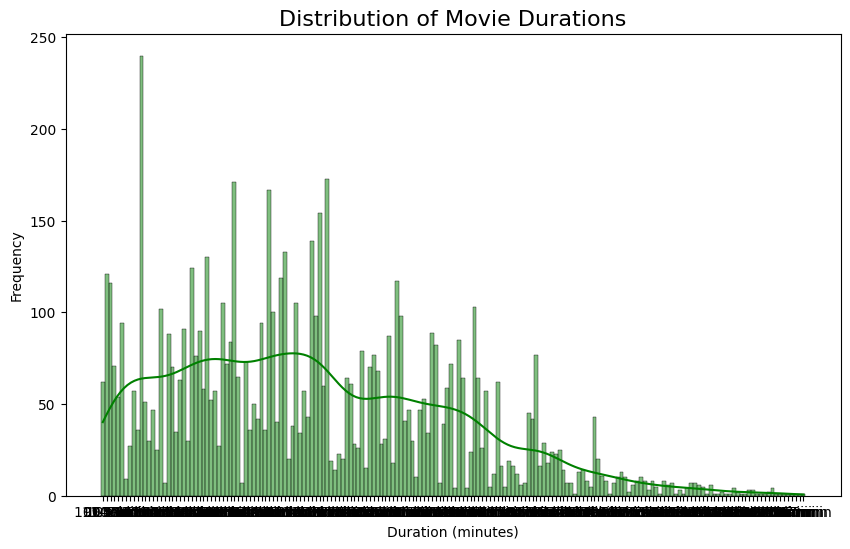

In [76]:
#Distribution of Movie Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=30, kde=True, color='green')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

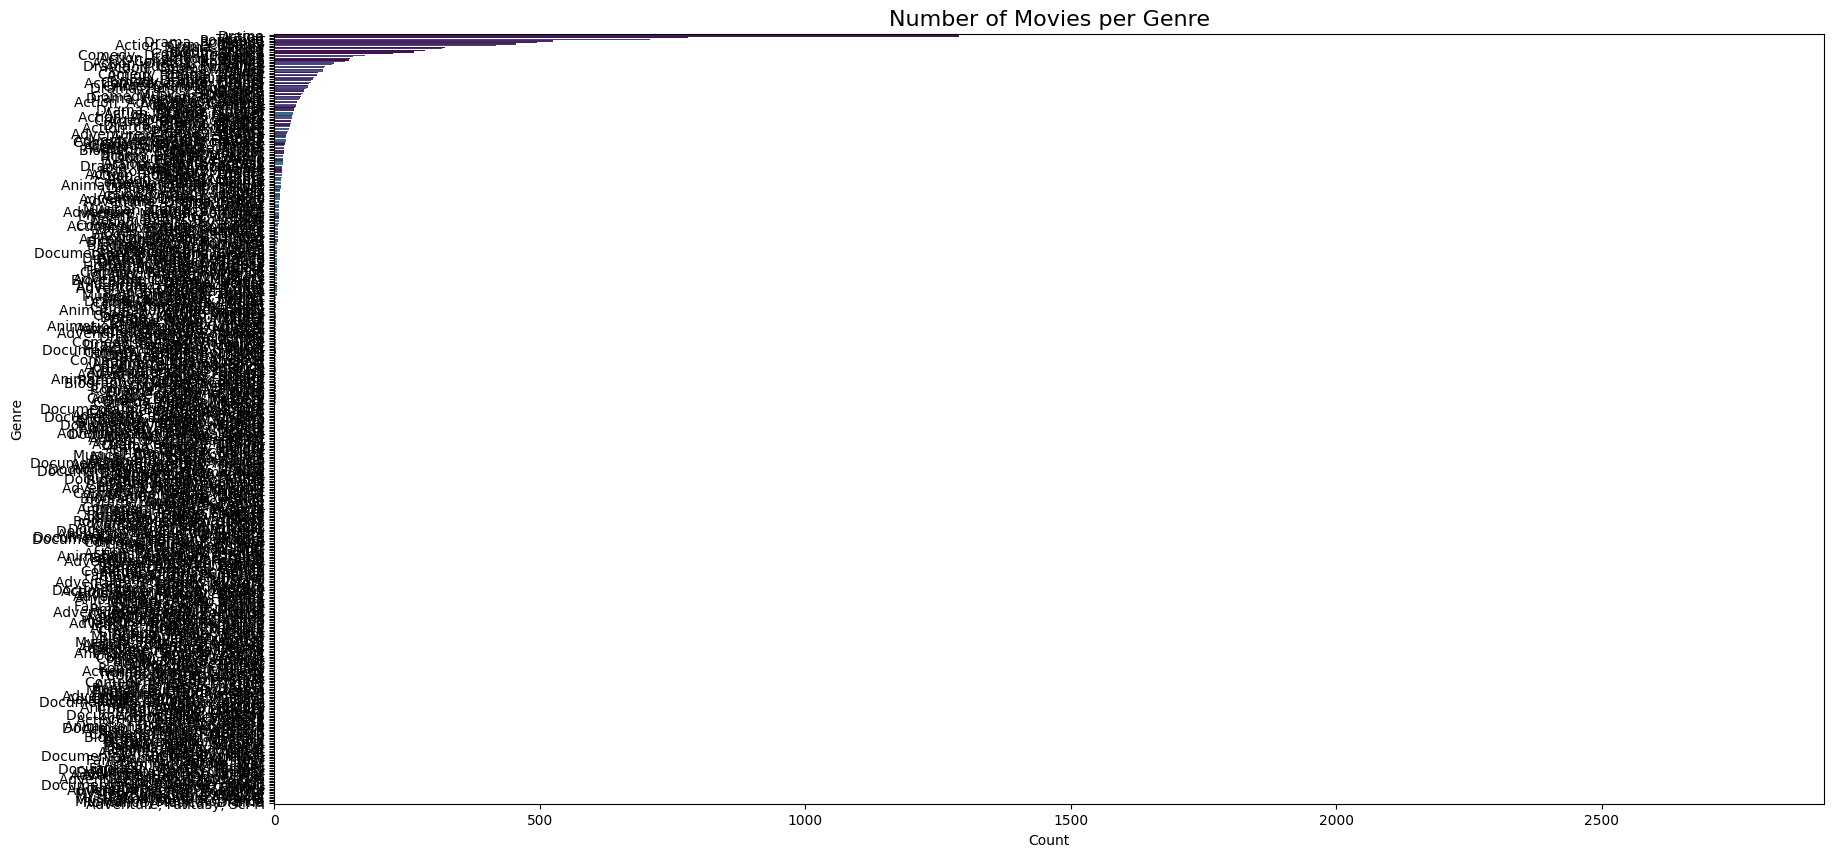

In [77]:
# Number of Movies per Genre
plt.figure(figsize=(20,10))
sns.countplot(data=df, y='Genre', hue='Genre', order=df['Genre'].value_counts().index, palette='viridis', legend=False)
plt.title('Number of Movies per Genre', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_12076\2765576078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='coolwarm')


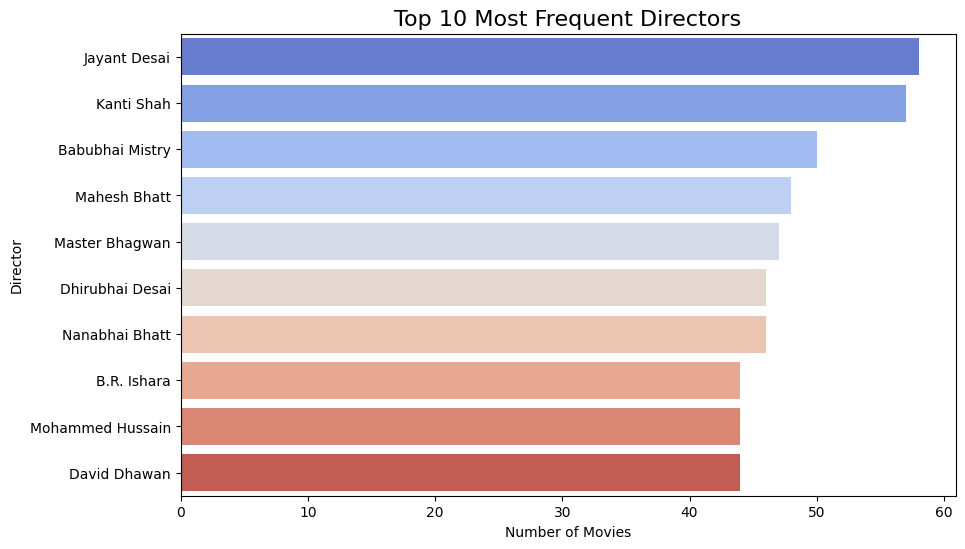

In [59]:
#Top 10 Most Frequent Directors
top_10_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Directors', fontsize=16)
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


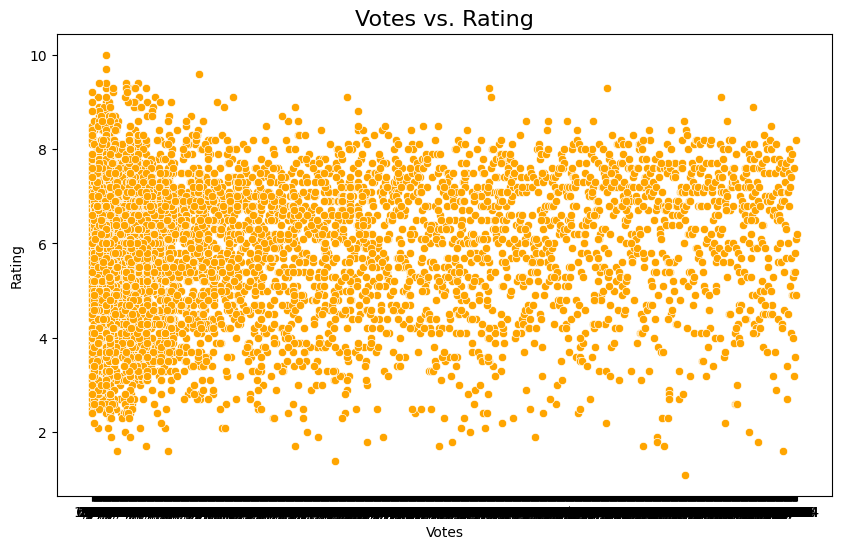

In [61]:
#Votes vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df, color='orange')
plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

In [65]:
#Display basic stats for further analysis
print("Basic Statistics:")
print(df.describe())


Basic Statistics:
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [67]:
#Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
dtype: int64
